In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

In [ ]:
import pandas as pd

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


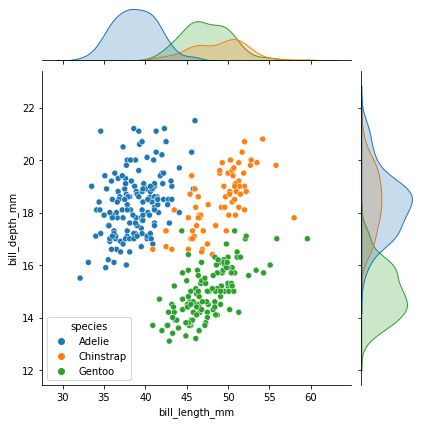

In [ ]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

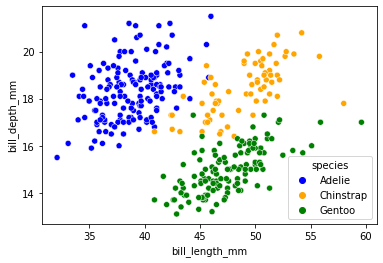

In [ ]:
colors = {'Adelie': 'blue', 'Chinstrap': 'orange', 'Gentoo': 'green'}
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue="species", palette=colors)

In [ ]:
penguins = penguins.dropna()

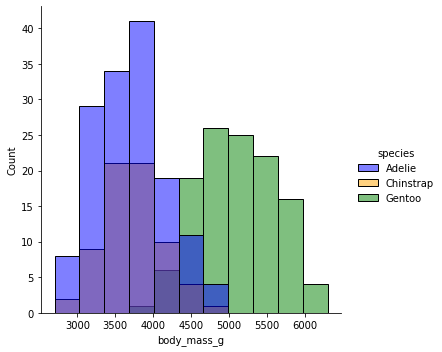

In [ ]:
sns.displot(data=penguins, x='body_mass_g', hue='species', palette=colors)

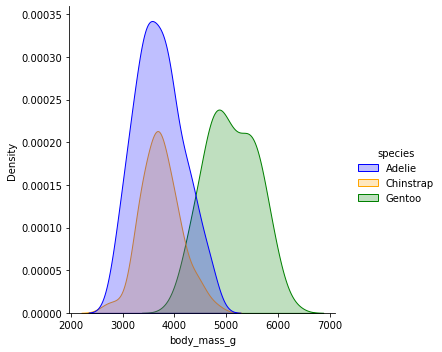

In [ ]:
sns.displot(data=penguins, x='body_mass_g', palette=colors, kind='kde', hue="species", fill=True)
# According to the below plot, Gentoo tends to be heavier than Adelie and Chinstrap

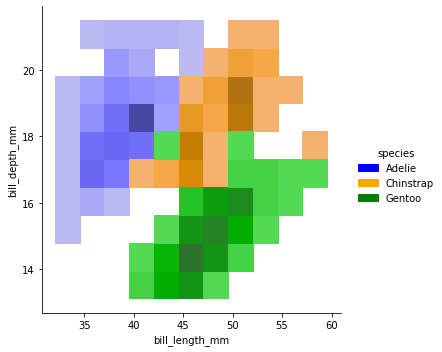

In [ ]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', palette=colors, hue="species")
# According to the below plot, Gentoo tends to have smaller bill_depth than other species
# Adelie tends to have shorter bill than Chinstrap and Gentoo

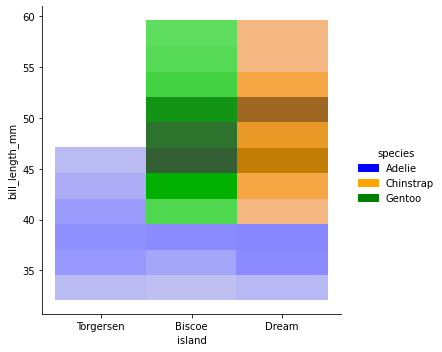

In [ ]:
sns.displot(data=penguins, x='island', y='bill_length_mm', palette=colors, hue='species')
# According to the below plot, only Adelie inhabits the Torgesen island

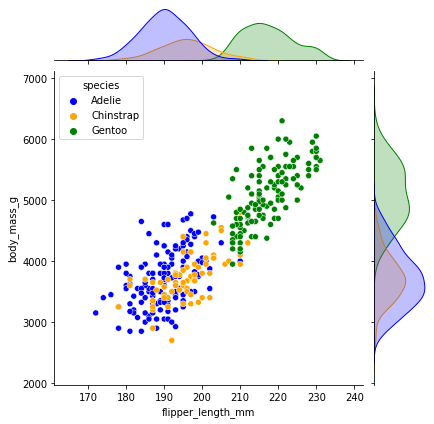

In [ ]:
sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette=colors)
# According to the below plot, Gentoo tends to have longer flipper and greater weight than Adelie and Chinstrap

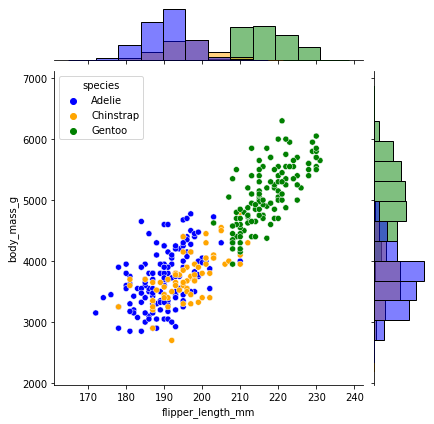

In [ ]:
peng_plt = sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette=colors)
peng_plt.plot_marginals(sns.histplot)

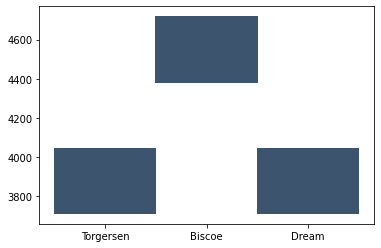

In [37]:
mw_Torgersen = penguins.loc[penguins['island'] == 'Torgersen', 'body_mass_g'].mean()
mw_Biscoe = penguins.loc[penguins['island'] == 'Biscoe', 'body_mass_g'].mean()
mw_Dream = penguins.loc[penguins['island'] == 'Dream', 'body_mass_g'].mean()
mean_weight = [mw_Torgersen, mw_Biscoe, mw_Dream]
island = ['Torgersen', 'Biscoe', 'Dream']
sns.histplot(x=island, y=mean_weight)
# According to the below plot, penguins inhabiting Biscoe tend to have greater body mass than those living in Torgersen and Dream

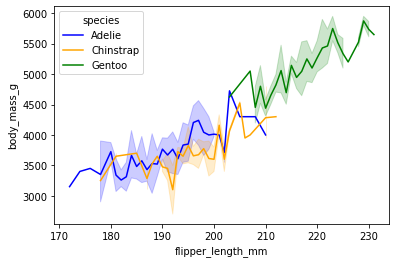

In [ ]:
# A more transparent way to observe the supremacy of Gentoo over other species when measuring flipper and weight
sns.lineplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette=colors)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# y corresponds to target_names
list_of_penguins = [i for i in penguins['species']]
for i in range(len(list_of_penguins)):
  if list_of_penguins[i]=='Adelie':
    list_of_penguins[i] = 1
  elif list_of_penguins[i]=='Chinstrap':
    list_of_penguins[i] = 2
  else:
    list_of_penguins[i] = 3
y = np.array(list_of_penguins)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
# target_names
target_names = np.array(['Adelie', 'Chinstrap', 'Gentoo'])
target_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype='<U9')

In [ ]:
# feature_names
feature_names = ['island', 'bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']
feature_names

['island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [ ]:
X = penguins.to_dict('split')['data']
for i in range(len(X)):
  X[i] = X[i][1:6]
  if X[i][0] == 'Torgersen':
    X[i][0] = 0
  elif X[i][0] == 'Biscoe':
    X[i][0] = 1
  else:
    X[i][0] = 2
X = np.array(X)
X

array([[0.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03],
       [0.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03],
       [0.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03],
       ...,
       [1.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03],
       [1.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03],
       [1.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



*  WE CAN EXAMINE THE RELATION BETWEEN MAX_DEPTH AND ACCURACY OF THE MODEL USING PLOT
*   A PLANE WHERE THE X-AXIS CORRESPONDS TO MAX_DEPTH AND Y-AXIS CORRESPONDS TO ACCURACY



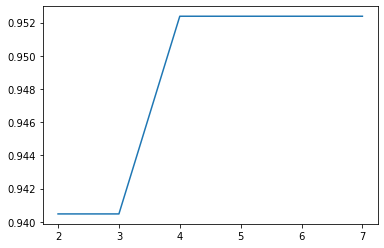

In [ ]:
# We examine max_depth from 2 to 7
model = [DecisionTreeClassifier(max_depth=i, random_state=42).fit(X_train, y_train) for i in range(2, 8)]
arr_max_depth = np.linspace(2, 7, 6)
arr_max_depth
arr_accuracy = np.array([model[i].score(X_test, y_test) for i in range(len(model))])
import matplotlib.pyplot as plt
plt.plot(arr_max_depth, arr_accuracy)

✅ ✅ ✅ `The accuracy of the model remarkably increases when max_depth move from 3 to 4` ✅ ✅ ✅

---



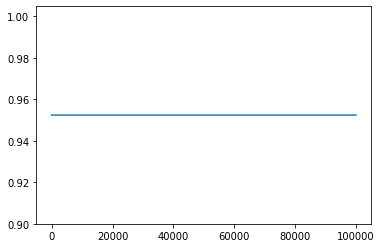

In [ ]:
# Then, We examine max_depth from 4 to 100003
model = [DecisionTreeClassifier(max_depth=i, random_state=42).fit(X_train, y_train) for i in range(4, 100004)]
arr_max_depth = np.linspace(4, 100003, 100000)
arr_max_depth
arr_accuracy = np.array([model[i].score(X_test, y_test) for i in range(len(model))])
import matplotlib.pyplot as plt
plt.plot(arr_max_depth, arr_accuracy)

✅ ✅ ✅ `The accuracy of the model remains almost stable when max_depth >= 4` ✅ ✅ ✅

▶ ▶ ▶ `At the depth of 4, the Decision Tree fully describes all circumstances`



In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

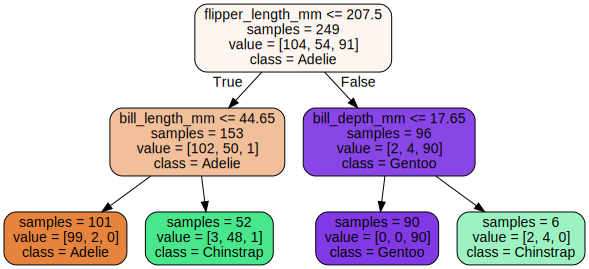

In [ ]:
# Drawing tree with max_depth = 2

tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file='penguins.dot', feature_names=feature_names, class_names=target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins.dot')